In [1]:
from prob140 import Table
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
def add(num1, num2):
    return num1 + num2

dice = [1, 2, 3, 4, 5, 6]
X = set()
Y = set()
all_poss = []

for d1 in dice:
    for d2 in dice:
        all_poss.append( str(d1)+str(d2) )  
        X.add( max(d1,d2) )
        Y.add( add(d1, d2) )

In [3]:
print("All possibilities are", all_poss)
print("Random Variable X:", X)
print("Random Variable Y:", Y)

All possibilities are ['11', '12', '13', '14', '15', '16', '21', '22', '23', '24', '25', '26', '31', '32', '33', '34', '35', '36', '41', '42', '43', '44', '45', '46', '51', '52', '53', '54', '55', '56', '61', '62', '63', '64', '65', '66']
Random Variable X: {1, 2, 3, 4, 5, 6}
Random Variable Y: {2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}


In [4]:
def str_max(str_poss):
    num1 = int(str_poss[0])
    num2 = int(str_poss[1])
    return max(num1,num2)

def str_add(str_poss):
    num1 = int(str_poss[0])
    num2 = int(str_poss[1])
    return num1 + num2


def calc_prob(num, all_poss, fun):
    c = 0
    
    for poss in all_poss:
        if fun(poss) == num:   # If this poss satisfies the Random Variable's individual then increase counter
            c = c + 1
    
    prob = c/len(all_poss)  
#     print(num, "occurs", c, "with", fun, "having", prob)
    return prob


# Calculating probs of all values of Random Variables
X_probs = {}
for x in X:
    X_probs[x] = calc_prob(x, all_poss, str_max)
# print()
Y_probs = {}
for y in Y:
    Y_probs[y] = calc_prob(y, all_poss, str_add)
    
print(round(sum(X_probs.values())) == 1)
print(round(sum(Y_probs.values())) == 1)
print(X_probs, '\n')
print(Y_probs)

True
True
{1: 0.027777777777777776, 2: 0.08333333333333333, 3: 0.1388888888888889, 4: 0.19444444444444445, 5: 0.25, 6: 0.3055555555555556} 

{2: 0.027777777777777776, 3: 0.05555555555555555, 4: 0.08333333333333333, 5: 0.1111111111111111, 6: 0.1388888888888889, 7: 0.16666666666666666, 8: 0.1388888888888889, 9: 0.1111111111111111, 10: 0.08333333333333333, 11: 0.05555555555555555, 12: 0.027777777777777776}


In [5]:
res = []   # Calculating probs of all cartesian pairs of X and Y
for x in X:
    for y in Y:
        prob = X_probs[x] * Y_probs[y]
#         print(x,"with",X_probs[x], y, "with", Y_probs[y], "has", prob)
        res.append(prob)

In [6]:
print(round(sum(res)) == 1)
print(len(res))

True
66


In [7]:
dist = Table().domain("X", X, "Y", Y)
print(dist, '\n')
print(dist.shape)

X    | Y
1    | 2
1    | 3
1    | 4
1    | 5
1    | 6
1    | 7
1    | 8
1    | 9
1    | 10
1    | 11
... (56 rows omitted) 

X    | Y
[66] | [66]


/home/muhammadammarabid/anaconda3/lib/python3.8/site-packages/datascience/tables.py:222: FutureWarning: Implicit column method lookup is deprecated.
  warnings.warn("Implicit column method lookup is deprecated.", FutureWarning)


In [8]:
dist = dist.probabilities(res)

In [9]:
dist

,X=1,X=2,X=3,X=4,X=5,X=6
Y=12,0.000772,0.002315,0.003858,0.005401,0.006944,0.008488
Y=11,0.001543,0.004630,0.007716,0.010802,0.013889,0.016975
Y=10,0.002315,0.006944,0.011574,0.016204,0.020833,0.025463
Y=9,0.003086,0.009259,0.015432,0.021605,0.027778,0.033951
Y=8,0.003858,0.011574,0.019290,0.027006,0.034722,0.042438
Y=7,0.004630,0.013889,0.023148,0.032407,0.041667,0.050926
Y=6,0.003858,0.011574,0.019290,0.027006,0.034722,0.042438
Y=5,0.003086,0.009259,0.015432,0.021605,0.027778,0.033951
Y=4,0.002315,0.006944,0.011574,0.016204,0.020833,0.025463
Y=3,0.001543,0.004630,0.007716,0.010802,0.013889,0.016975


In [10]:
dist.both_marginals()

,X=1,X=2,X=3,X=4,X=5,X=6,Sum: Marginal of Y
Y=12,0.000772,0.002315,0.003858,0.005401,0.006944,0.008488,0.027778
Y=11,0.001543,0.004630,0.007716,0.010802,0.013889,0.016975,0.055556
Y=10,0.002315,0.006944,0.011574,0.016204,0.020833,0.025463,0.083333
Y=9,0.003086,0.009259,0.015432,0.021605,0.027778,0.033951,0.111111
Y=8,0.003858,0.011574,0.019290,0.027006,0.034722,0.042438,0.138889
Y=7,0.004630,0.013889,0.023148,0.032407,0.041667,0.050926,0.166667
Y=6,0.003858,0.011574,0.019290,0.027006,0.034722,0.042438,0.138889
Y=5,0.003086,0.009259,0.015432,0.021605,0.027778,0.033951,0.111111
Y=4,0.002315,0.006944,0.011574,0.016204,0.020833,0.025463,0.083333
Y=3,0.001543,0.004630,0.007716,0.010802,0.013889,0.016975,0.055556


In [11]:
X_marginal_dist = dist.marginal_dist("X")
print(X_marginal_dist)

Value | Probability
1     | 0.0277778
2     | 0.0833333
3     | 0.138889
4     | 0.194444
5     | 0.25
6     | 0.305556


In [12]:
X_vals, X_probs = X_marginal_dist[0], X_marginal_dist[1]
print( X_vals, X_probs)

[1 2 3 4 5 6] [0.02777778 0.08333333 0.13888889 0.19444444 0.25       0.30555556]


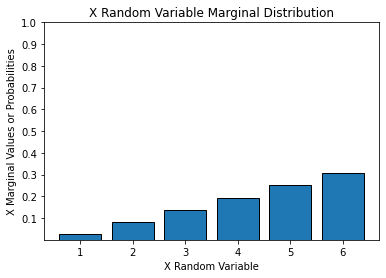

In [13]:
def plot_X_marginal_dist(X_vals, X_probs):
    plt.bar(X_vals, X_probs)
    plt.yticks(np.arange(0.1, 1.10, 0.10))
    plt.xlabel("X Random Variable")
    plt.ylabel("X Marginal Values or Probabilities")
    plt.title("X Random Variable Marginal Distribution")
    plt.show()
    
plot_X_marginal_dist(X_vals, X_probs)

In [15]:
Y_marginal_dist = dist.marginal_dist("Y")
print(Y_marginal_dist)

Value | Probability
2     | 0.0277778
3     | 0.0555556
4     | 0.0833333
5     | 0.111111
6     | 0.138889
7     | 0.166667
8     | 0.138889
9     | 0.111111
10    | 0.0833333
11    | 0.0555556
... (1 rows omitted)


In [16]:
Y_vals, Y_probs = Y_marginal_dist[0], Y_marginal_dist[1]
print(Y_vals, Y_probs)

[ 2  3  4  5  6  7  8  9 10 11 12] [0.02777778 0.05555556 0.08333333 0.11111111 0.13888889 0.16666667
 0.13888889 0.11111111 0.08333333 0.05555556 0.02777778]


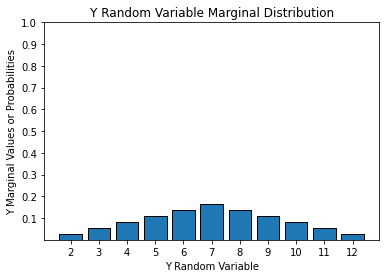

In [17]:
def plot_Y_marginal_dist(Y_vals, Y_probs):
    plt.bar(Y_vals, Y_probs)
    plt.xticks(np.arange(2, 13, 1))
    plt.yticks(np.arange(0.1, 1.10, 0.10))
    plt.xlabel("Y Random Variable")
    plt.ylabel("Y Marginal Values or Probabilities")
    plt.title("Y Random Variable Marginal Distribution")
    plt.show()

plot_Y_marginal_dist(Y_vals, Y_probs)

# Let's Try Challenge Question

In [18]:
first_half_prob = 0.4/3   # because 0.4 is prob of 1-3 but then prob of each would be 0.4/3
second_half_prob = 0.6/3  # because 0.6 is prob of 4-6 but then prob of each would be 0.6/3
unfair_dice = [(1, first_half_prob), (2, first_half_prob), (3, first_half_prob), 
               (4, second_half_prob), (5, second_half_prob), (6, second_half_prob)]
all_poss = []

for d1 in unfair_dice:
    for d2 in unfair_dice:
        all_poss.append( (str(d1[0])+str(d2[0]), d1[1]*d2[1]) )

print("All possibilities are", all_poss)
print("Random Variable X:", X)
print("Random Variable Y:", Y)
print( round(sum(p[1] for p in all_poss)) == 1 )

All possibilities are [('11', 0.017777777777777778), ('12', 0.017777777777777778), ('13', 0.017777777777777778), ('14', 0.026666666666666665), ('15', 0.026666666666666665), ('16', 0.026666666666666665), ('21', 0.017777777777777778), ('22', 0.017777777777777778), ('23', 0.017777777777777778), ('24', 0.026666666666666665), ('25', 0.026666666666666665), ('26', 0.026666666666666665), ('31', 0.017777777777777778), ('32', 0.017777777777777778), ('33', 0.017777777777777778), ('34', 0.026666666666666665), ('35', 0.026666666666666665), ('36', 0.026666666666666665), ('41', 0.026666666666666665), ('42', 0.026666666666666665), ('43', 0.026666666666666665), ('44', 0.039999999999999994), ('45', 0.039999999999999994), ('46', 0.039999999999999994), ('51', 0.026666666666666665), ('52', 0.026666666666666665), ('53', 0.026666666666666665), ('54', 0.039999999999999994), ('55', 0.039999999999999994), ('56', 0.039999999999999994), ('61', 0.026666666666666665), ('62', 0.026666666666666665), ('63', 0.02666666

In [19]:
# This logic could be used for above case too, it would give same results
def calc_prob(num, all_poss, fun):
    total_prob = 0   
    
    for poss in all_poss:
        # Summing the probs of the possibilities which satisfy Random Variable's individual
        if fun(poss[0]) == num:   
            total_prob = total_prob + poss[1]
    
    return total_prob

In [20]:
X_probs = {}
for x in X:
    X_probs[x] = calc_prob(x, all_poss, str_max)
# print()
Y_probs = {}
for y in Y:
    Y_probs[y] = calc_prob(y, all_poss, str_add)
    
print(round(sum(X_probs.values())) == 1)
print(round(sum(Y_probs.values())) == 1)
print(X_probs, '\n')
print(Y_probs)

True
True
{1: 0.017777777777777778, 2: 0.05333333333333333, 3: 0.08888888888888889, 4: 0.2, 5: 0.27999999999999997, 6: 0.35999999999999993} 

{2: 0.017777777777777778, 3: 0.035555555555555556, 4: 0.05333333333333333, 5: 0.08888888888888888, 6: 0.12444444444444444, 7: 0.16, 8: 0.14666666666666667, 9: 0.1333333333333333, 10: 0.11999999999999998, 11: 0.07999999999999999, 12: 0.039999999999999994}


In [21]:
# Probs of all cartesian pairs
res = []
for x in X:
    for y in Y:
        prob = X_probs[x] * Y_probs[y]
#         print(x,"with",X_probs[x], y, "with", Y_probs[y], "has", prob)
        res.append(prob)

print()        
print(round(sum(res)) == 1)
print(len(res))        


True
66


In [22]:
dist = Table().domain("X", X, "Y", Y)
print(dist, '\n')
print(dist.shape)
dist = dist.probabilities(res)

X    | Y
1    | 2
1    | 3
1    | 4
1    | 5
1    | 6
1    | 7
1    | 8
1    | 9
1    | 10
1    | 11
... (56 rows omitted) 

X    | Y
[66] | [66]


/home/muhammadammarabid/anaconda3/lib/python3.8/site-packages/datascience/tables.py:222: FutureWarning: Implicit column method lookup is deprecated.
  warnings.warn("Implicit column method lookup is deprecated.", FutureWarning)


In [23]:
dist

,X=1,X=2,X=3,X=4,X=5,X=6
Y=12,0.000711,0.002133,0.003556,0.008000,0.011200,0.0144
Y=11,0.001422,0.004267,0.007111,0.016000,0.022400,0.0288
Y=10,0.002133,0.006400,0.010667,0.024000,0.033600,0.0432
Y=9,0.002370,0.007111,0.011852,0.026667,0.037333,0.0480
Y=8,0.002607,0.007822,0.013037,0.029333,0.041067,0.0528
Y=7,0.002844,0.008533,0.014222,0.032000,0.044800,0.0576
Y=6,0.002212,0.006637,0.011062,0.024889,0.034844,0.0448
Y=5,0.001580,0.004741,0.007901,0.017778,0.024889,0.0320
Y=4,0.000948,0.002844,0.004741,0.010667,0.014933,0.0192
Y=3,0.000632,0.001896,0.003160,0.007111,0.009956,0.0128


In [24]:
dist.both_marginals()

,X=1,X=2,X=3,X=4,X=5,X=6,Sum: Marginal of Y
Y=12,0.000711,0.002133,0.003556,0.008000,0.011200,0.0144,0.040000
Y=11,0.001422,0.004267,0.007111,0.016000,0.022400,0.0288,0.080000
Y=10,0.002133,0.006400,0.010667,0.024000,0.033600,0.0432,0.120000
Y=9,0.002370,0.007111,0.011852,0.026667,0.037333,0.0480,0.133333
Y=8,0.002607,0.007822,0.013037,0.029333,0.041067,0.0528,0.146667
Y=7,0.002844,0.008533,0.014222,0.032000,0.044800,0.0576,0.160000
Y=6,0.002212,0.006637,0.011062,0.024889,0.034844,0.0448,0.124444
Y=5,0.001580,0.004741,0.007901,0.017778,0.024889,0.0320,0.088889
Y=4,0.000948,0.002844,0.004741,0.010667,0.014933,0.0192,0.053333
Y=3,0.000632,0.001896,0.003160,0.007111,0.009956,0.0128,0.035556


In [25]:
X_marginal_dist = dist.marginal_dist("X")
X_vals, X_probs = X_marginal_dist[0], X_marginal_dist[1]
print(X_vals, X_probs, '\n')

Y_marginal_dist = dist.marginal_dist("Y")
Y_vals, Y_probs = Y_marginal_dist[0], Y_marginal_dist[1]
print(Y_vals, Y_probs)

[1 2 3 4 5 6] [0.01777778 0.05333333 0.08888889 0.2        0.28       0.36      ] 

[ 2  3  4  5  6  7  8  9 10 11 12] [0.01777778 0.03555556 0.05333333 0.08888889 0.12444444 0.16
 0.14666667 0.13333333 0.12       0.08       0.04      ]


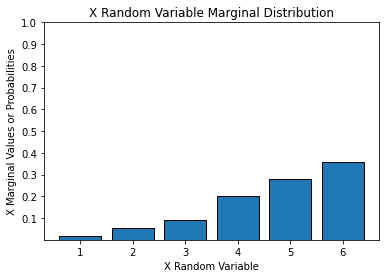

In [26]:
plot_X_marginal_dist(X_vals, X_probs)  # Difference btw 1-3 and 4-6 is little bit more compared to fair one

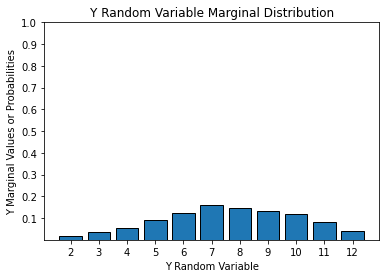

In [27]:
plot_Y_marginal_dist(Y_vals, Y_probs) # Change after 7 compared to last one